In [20]:
%load_ext autoreload

%autoreload 2

from countrycrab import configure
from countrycrab import analyze
import os
import matplotlib.pyplot as plt
import numpy as np
import json
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3,4,5,6,7"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2024-02-24 00:36:15,257	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-02-24 00:36:15,449	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


### Generate a list of instances for hyperparameters optimization and testing

In the case, all instance from the SATLIB dataset uf20-91 https://www.cs.ubc.ca/~hoos/SATLIB/benchm.html are in the /data folder

20% of them are selected for hyperparemeters optimization and remaining 80% for testing

In [12]:
module_path = os.path.abspath(os.path.join(".."))
instances_path = module_path+'/data/uf20-91/'
instances_hpo, instances_test = configure.split_hpo_test(instances_path,hpo_test = 0.2)

### Create a configuration file for Hyper Parameters Optimization and save it in the config solver

In [27]:
configuration = {
    # Heuristic parameters
    "max_runs": 10000,
    "max_flips": 1000,
    "noise_distribution": "normal",
    # HyperParameters. num_samples points between min_noise and max_noise will be generated for each instance in the instance_list
    "min_noise":0.5,
    "max_noise":1,
    "num_samples": 5,
    # Experiments parameter
    "p_solve": 0.99,
    "task": "hpo",
    "experiment_name": "hpo_example",
    "instance_list": instances_hpo[0:10],
}

In [28]:
# Specify the filename
filename = "hpo_example.json"
filename = module_path+'/config/'+filename
# Writing JSON data
with open(filename, 'w') as f:
    json.dump(configuration, f, indent=4)


### Run the hyperparameters optimization experiment

Open a shell and run<br>
`
python3 countrycrab/hpo.py --tracking_uri='hpo_test' --config='hpo_example.json' 
`<br><br>
where `tracking_uri` is the mlflow uri where the experiments will be stored, and `config` the configuration file previously created

### Analyze the hyperparameters optimization experiment

In [29]:
tracking_uri = module_path+'/data/experiments/hpo_test/'
experiment_name = 'hpo_example'
result = analyze.generate_report_hpo(tracking_uri,experiment_name)

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/mlflow/store/tracking/file_store.py", line 885, in _list_run_infos
    run_info = self._get_run_info_from_dir(r_dir)
  File "/usr/local/lib/python3.10/dist-packages/mlflow/store/tracking/file_store.py", line 696, in _get_run_info_from_dir
    meta = FileStore._read_yaml(run_dir, FileStore.META_DATA_FILE_NAME)
  File "/usr/local/lib/python3.10/dist-packages/mlflow/store/tracking/file_store.py", line 1306, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "/usr/local/lib/python3.10/dist-packages/mlflow/store/tracking/file_store.py", line 1299, in _read_helper
    result = read_yaml(root, file_name)
  File "/usr/local/lib/python3.10/dist-packages/mlflow/utils/file_utils.py", line 282, in read_yaml
    raise MissingConfigException(f"Yaml file '{file_path}' does not exist.")
mlflow.exceptions.MissingConfigException: Yaml file '/home/pedretti/projects/CountryCrab/data/ex

In [33]:
result.head()

,its_opt,max_flips_opt,time_this_iter_s,done,training_iteration,trial_id,date,timestamp,time_total_s,pid,hostname,node_ip,time_since_restore,iterations_since_restore,config/instance,config/noise,logdir
0,833.401441,968,10.940686,False,1,c5d36_00000,2024-02-24_00-51-13,1708735873,10.940686,27207,CountryCrab-container,172.17.0.3,10.940686,1,/home/pedretti/projects/CountryCrab/data/uf20-...,0.772091,/home/pedretti/projects/CountryCrab/data/exper...
1,286.958858,339,10.294936,False,1,c5d36_00001,2024-02-24_00-51-13,1708735873,10.294936,27208,CountryCrab-container,172.17.0.3,10.294936,1,/home/pedretti/projects/CountryCrab/data/uf20-...,0.816169,/home/pedretti/projects/CountryCrab/data/exper...
2,1957.677033,784,11.194955,False,1,c5d36_00002,2024-02-24_00-51-14,1708735874,11.194955,27209,CountryCrab-container,172.17.0.3,11.194955,1,/home/pedretti/projects/CountryCrab/data/uf20-...,0.683960,/home/pedretti/projects/CountryCrab/data/exper...
3,1106.037724,34,11.535578,False,1,c5d36_00003,2024-02-24_00-51-14,1708735874,11.535578,27210,CountryCrab-container,172.17.0.3,11.535578,1,/home/pedretti/projects/CountryCrab/data/uf20-...,0.546535,/home/pedretti/projects/CountryCrab/data/exper...
4,792.615332,829,11.367804,False,1,c5d36_00004,2024-02-24_00-51-14,1708735874,11.367804,27211,CountryCrab-container,172.17.0.3,11.367804,1,/home/pedretti/projects/CountryCrab/data/uf20-...,0.761186,/home/pedretti/projects/CountryCrab/data/exper...


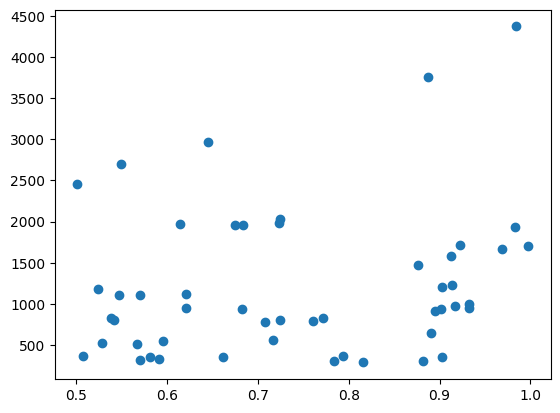

In [32]:
plt.plot(result['config/noise'],result['its_opt'],'o')

In [23]:
module_path

'/home/pedretti/projects/CountryCrab'